In [1]:
# Assignment 1 Solution

# Question 1: Probability under Normal Distribution
from scipy.stats import norm

mean = 42
std = 8
p1 = norm.cdf(30, mean, std)
p2 = norm.cdf(20, mean, std)
prob = p1 - p2
print(f"Q1: Probability Z-Phone lasts between 20 and 30 months: {prob:.4f}")



Q1: Probability Z-Phone lasts between 20 and 30 months: 0.0638


In [2]:
# Question 2: Median with censored data
import numpy as np

data = [75, 63, 100, 36, 51, 45, 80, 90]  # 100+ treated as 100
median = np.median(data)
print(f"Q2: Median survival time: {median} hours")




Q2: Median survival time: 69.0 hours


In [6]:
# Given summary values
n = 250
sum_x = 11211.00
sum_y = 44520.80
sum_x2 = 543503.00
sum_y2 = 8110405.02
sum_xy = 1996904.15

# Mean of x and y
mean_x = sum_x / n
mean_y = sum_y / n

# Calculate slope (b) and intercept (a)
numerator = sum_xy - (sum_x * sum_y) / n
denominator = sum_x2 - (sum_x ** 2) / n
b = numerator / denominator
a = mean_y - b * mean_x

print(f"Q3(a): Slope (b) = {b:.4f}, Intercept (a) = {a:.4f}")

# Q3(b): Predict weight for a 25-year-old
x = 25
predicted_y = a + b * x
print(f"Q3(b): Predicted weight at age 25 = {predicted_y:.2f} lbs")

# Q3(c): Observed weight = 170 lbs
observed_y = 170
residual = observed_y - predicted_y
print(f"Q3(c): Residual = {residual:.2f} lbs")

# Q3(d): Overestimate or Underestimate
if residual > 0:
    print("Q3(d): The prediction was an underestimate.")
else:
    print("Q3(d): The prediction was an overestimate.")



Q3(a): Slope (b) = 0.0101, Intercept (a) = 177.6284
Q3(b): Predicted weight at age 25 = 177.88 lbs
Q3(c): Residual = -7.88 lbs
Q3(d): The prediction was an overestimate.


Q4: Sample A - Mean: 2.42, Variance: 0.2854, Std Dev: 0.53


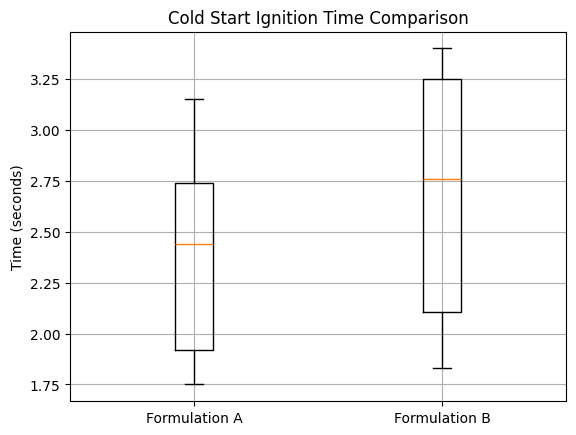

In [4]:
# Question 4: Sample stats and box plots
import matplotlib.pyplot as plt

a = [1.75, 1.92, 2.62, 2.35, 3.09, 3.15, 2.53, 1.91]
b = [1.83, 1.99, 3.13, 3.29, 2.65, 2.87, 3.40, 2.46, 1.89, 3.35]

mean_a = np.mean(a)
var_a = np.var(a, ddof=1)
std_a = np.std(a, ddof=1)
print(f"Q4: Sample A - Mean: {mean_a:.2f}, Variance: {var_a:.4f}, Std Dev: {std_a:.2f}")

plt.boxplot([a, b], labels=['Formulation A', 'Formulation B'])
plt.title("Cold Start Ignition Time Comparison")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()



Q5: Degree 1 Polynomial - MSE: 10.48


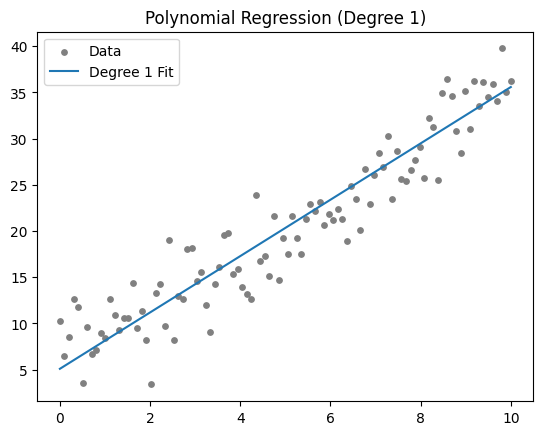

Q5: Degree 2 Polynomial - MSE: 7.78


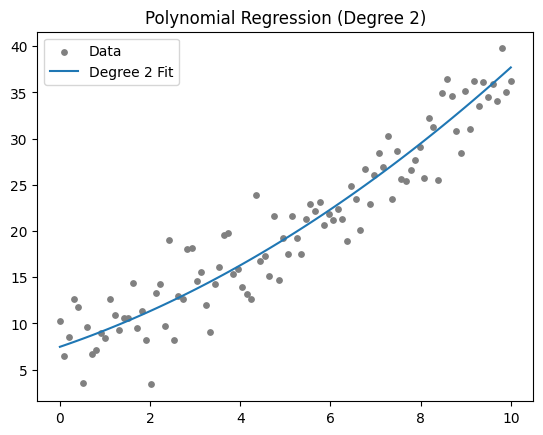

Q5: Degree 3 Polynomial - MSE: 7.78


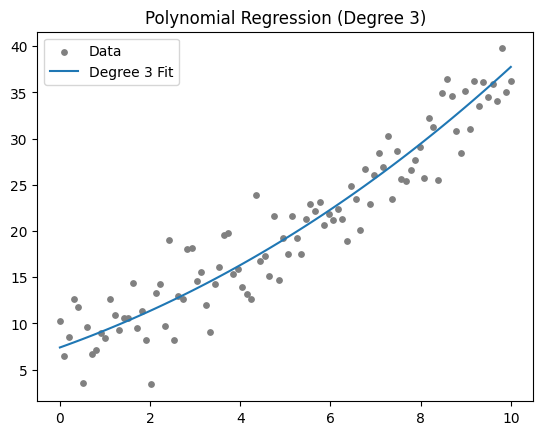

In [5]:
# Question 5: ML - Linear and Polynomial Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X.flatten() + 5 + np.random.normal(0, 3, size=100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_and_plot(degree):
    poly = PolynomialFeatures(degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    y_pred = model.predict(X_poly_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Q5: Degree {degree} Polynomial - MSE: {mse:.2f}")

    # Plot
    plt.scatter(X, y, color='gray', label='Data', s=15)
    X_full_poly = poly.transform(X)
    y_fit = model.predict(X_full_poly)
    plt.plot(X, y_fit, label=f'Degree {degree} Fit')
    plt.legend()
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.show()

train_and_plot(1)
train_and_plot(2)
train_and_plot(3)